In [1]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [2]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [3]:
model_path = "models/tuned/lightgbm_optuna_20250415_205333.joblib"
lightgbm_optuna_model = joblib.load(model_path)

In [4]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [5]:
#Predict class labels
y_pred = lightgbm_optuna_model.predict(X_test)

#Predict probabilities for ROC/PR curves
y_prob = lightgbm_optuna_model.predict_proba(X_test)[:, 1]

In [6]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print(report)

              precision    recall  f1-score   support

 Not Churned       0.88      0.96      0.92      1593
     Churned       0.75      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



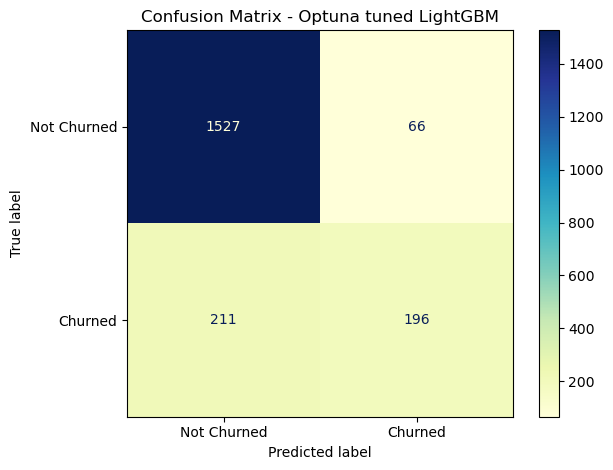

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Churned", "Churned"]).plot(cmap="YlGnBu")
plt.title("Confusion Matrix - Optuna tuned LightGBM")
plt.tight_layout()
plt.show()

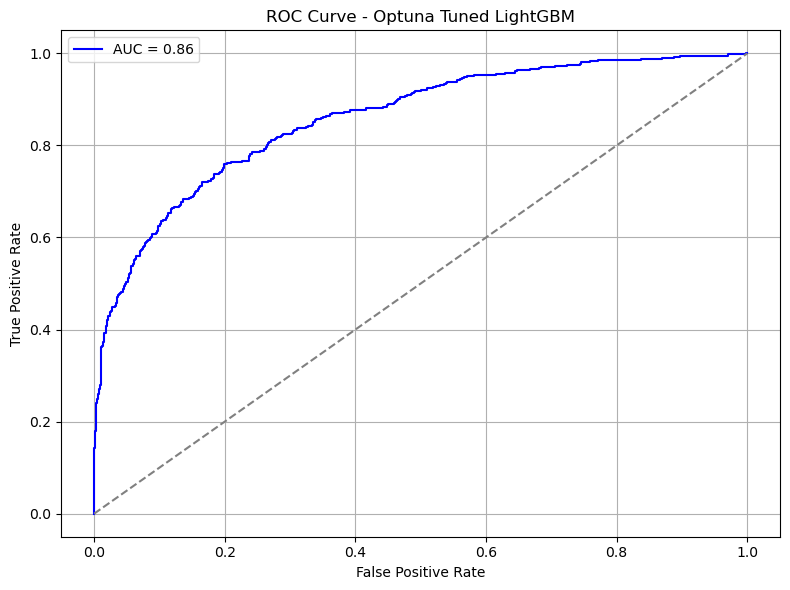

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optuna Tuned LightGBM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

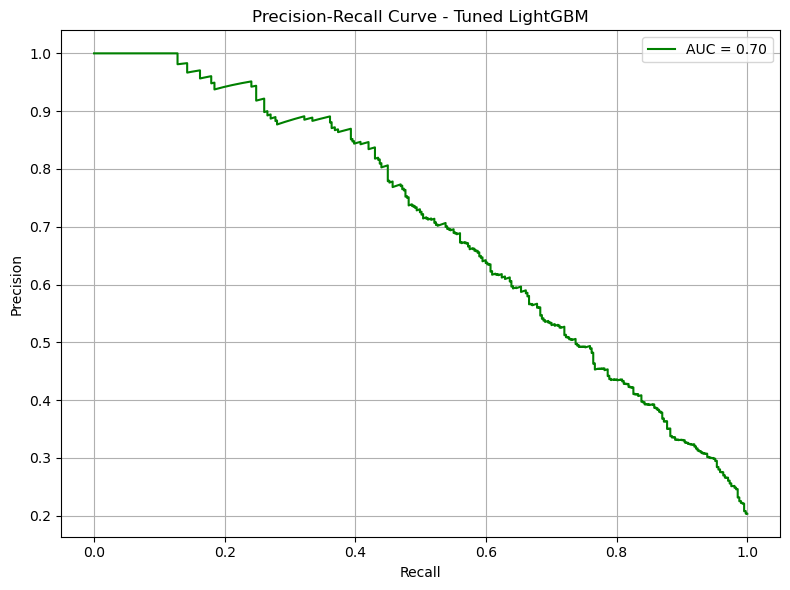

In [ ]:
from sklearn.metrics import auc


precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Optuna Tuned LightGBM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()